# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from category_encoders import *
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

Let's get this data in here and take a look at the variables

In [3]:
df = pd.read_csv('Wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


There are 8 variables. It is not immediately clear what they mean, especially 'Channel'.. so let's look at metadata available online. So 'Channel' is category of client (restaurants vs food retail), and the numbers are their annual spending on different product categories. 

Everything is described as an integer, but it does look like both 'Channel' and 'Region' are actually categorical (nominal) and will need to be coded as such.

There are no 'null' values, but we'll also see whether 0 has been used as a null value when we run describe below.

In [5]:
df.shape

(440, 8)

In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


These values look good - zero hasn't been used as a space-filler here. However, looking at the 50% value vs the max, there is a lot of skew happening in this data. We can confirm with a histogram plot and box plots.

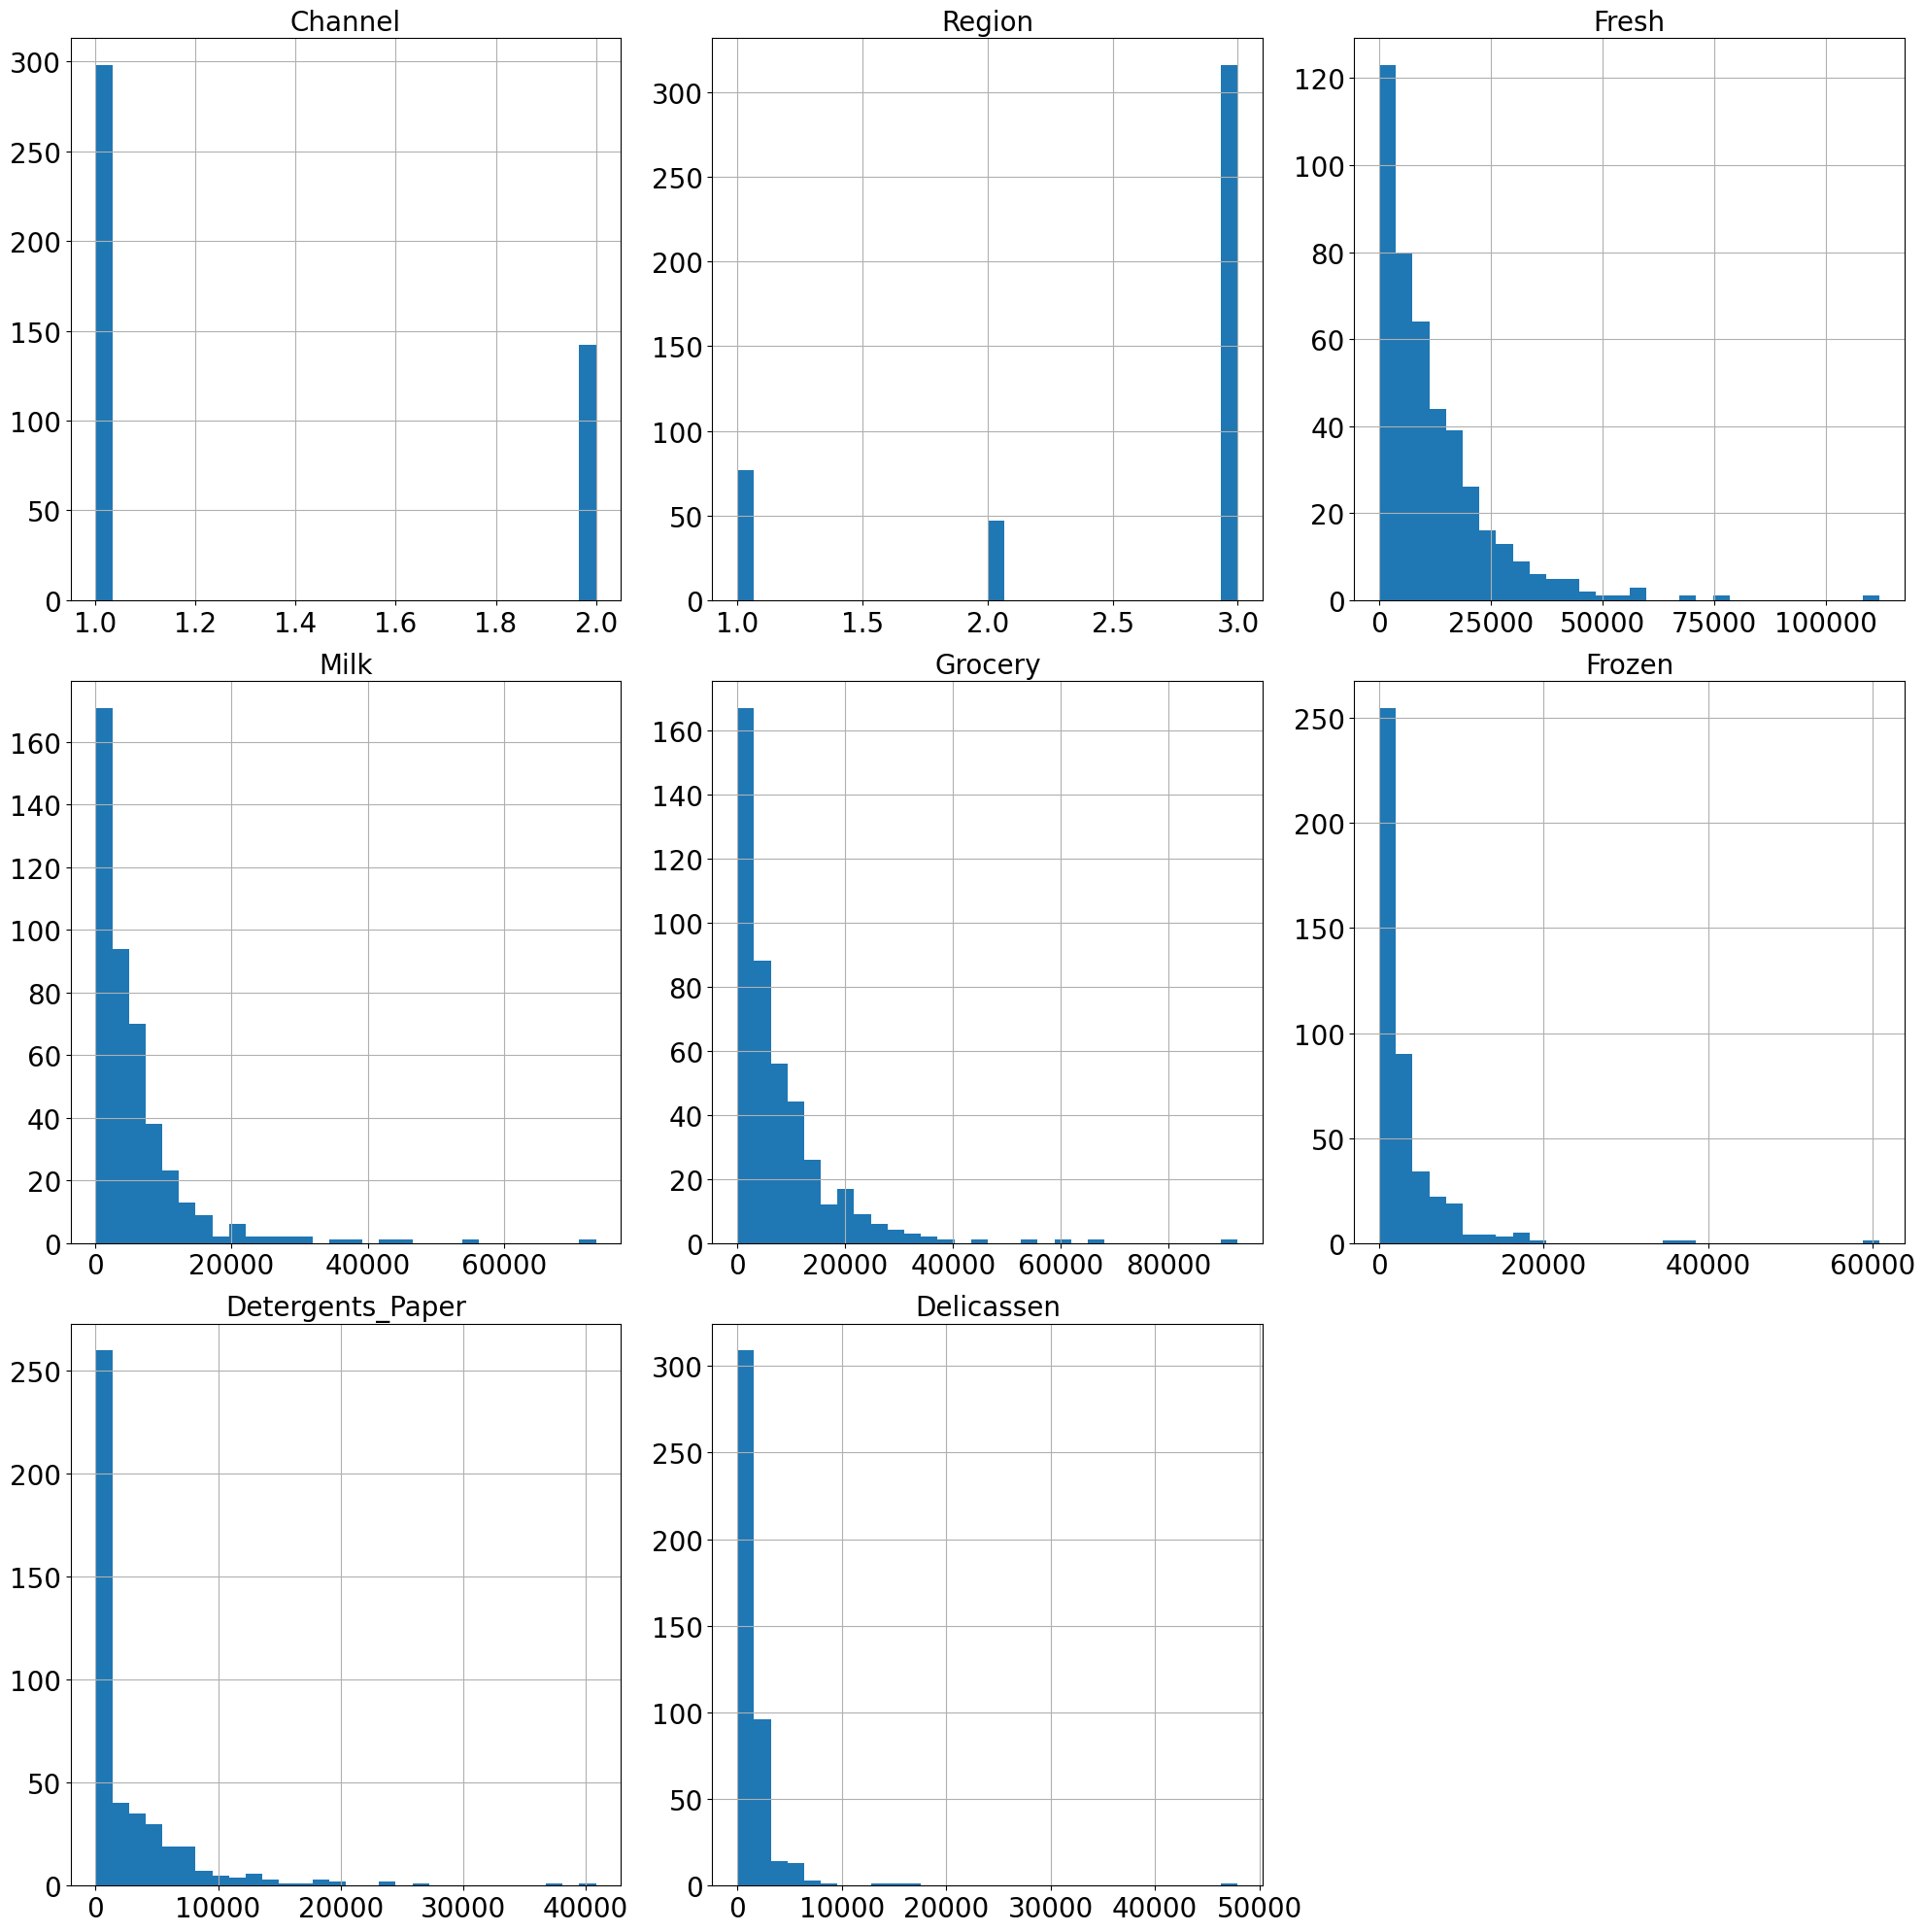

In [26]:
graphing = df[['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
graphing.hist(bins=30,figsize=(20, 20))
plt.tight_layout()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rc('figure', titlesize=20)
plt.show()
# plt.savefig('eda_histograms.png')

Okay, so there are more 1s than 2s in the 'Channel' variable (twice as many). It looks like there are 3 regions, and region 3 represented as many as 5 out of 6 times in the data. We will definitely be scaling and normalizing this data.

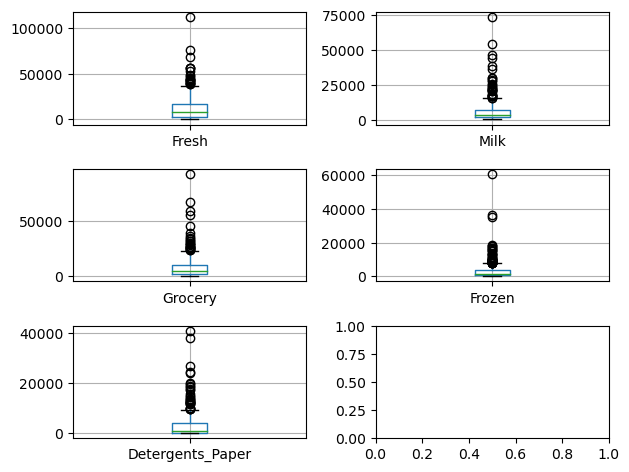

In [104]:
graphing2 = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

fig, axes = plt.subplots(3,2) #create figure and axes - 
                       
for i, el in enumerate(list(graphing2.columns.values)[:-1]):
    a = graphing2.boxplot(el, ax=axes.flatten()[i])

# fig.delaxes(axes[1,1]) #delete empty subplot
plt.tight_layout() 
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.rc('figure', titlesize=10)
plt.show()

Now, lastly, let's see if there are any correlated values.

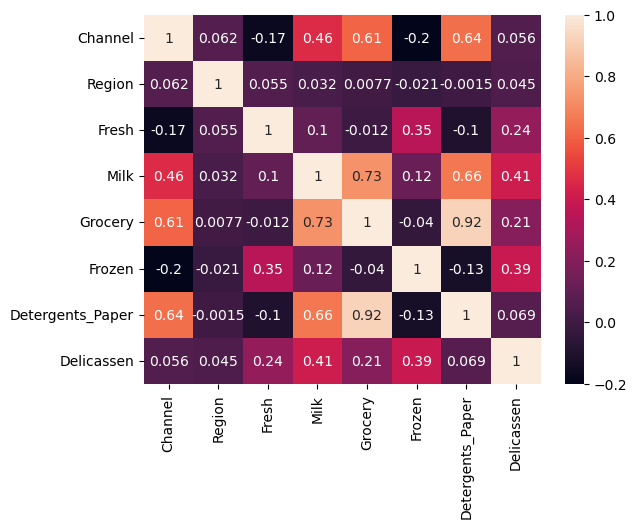

In [30]:
sns.heatmap(df.corr(), annot = True)
plt.show()

So, our 'Channel' variable seems positively correlated to 'Grocery' and 'Detergents_Paper'.
'Milk' and 'Grocery' are 73% overlapping, while 'Grocery' and 'Detergents_Paper' are over 92% correlated.
We're probably going to need to perform some feature engineering to either combine these or eliminate one from each pair.

Let's first define our categorical variables as categories

In [33]:
cats = df[['Channel','Region']]

#convert them to Pandas category
for col in cats:
    df[col] = df[col].astype('category')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


In [40]:
# encode categorical variables with nominal encoding

encoder=OneHotEncoder(cols = ['Channel','Region'])

df = encoder.fit_transform(df)

Amazing. But, I don't think we're going to be using these variables in our analyses. So, after all that, lets drop them!

In [105]:
df1 = df.drop(['Channel_1','Channel_2','Region_1','Region_2','Region_3'],axis=1)

In [106]:
df1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


Let's normalize this data by applying a log transformation.

In [107]:
df1['Fresh']=np.log(df['Fresh'])
df1['Milk']=np.log(df['Milk'])
df1['Grocery']=np.log(df['Grocery'])
df1['Frozen']=np.log(df['Frozen'])
df1['Det_Pap']=np.log(df['Detergents_Paper'])
df1['Deli']=np.log(df['Delicassen'])
df1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Det_Pap,Deli
0,9.446913,9.175335,8.930759,5.365976,2674,1338,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,3293,1776,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,3516,7844,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,507,1788,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,1777,5185,7.482682,8.553525


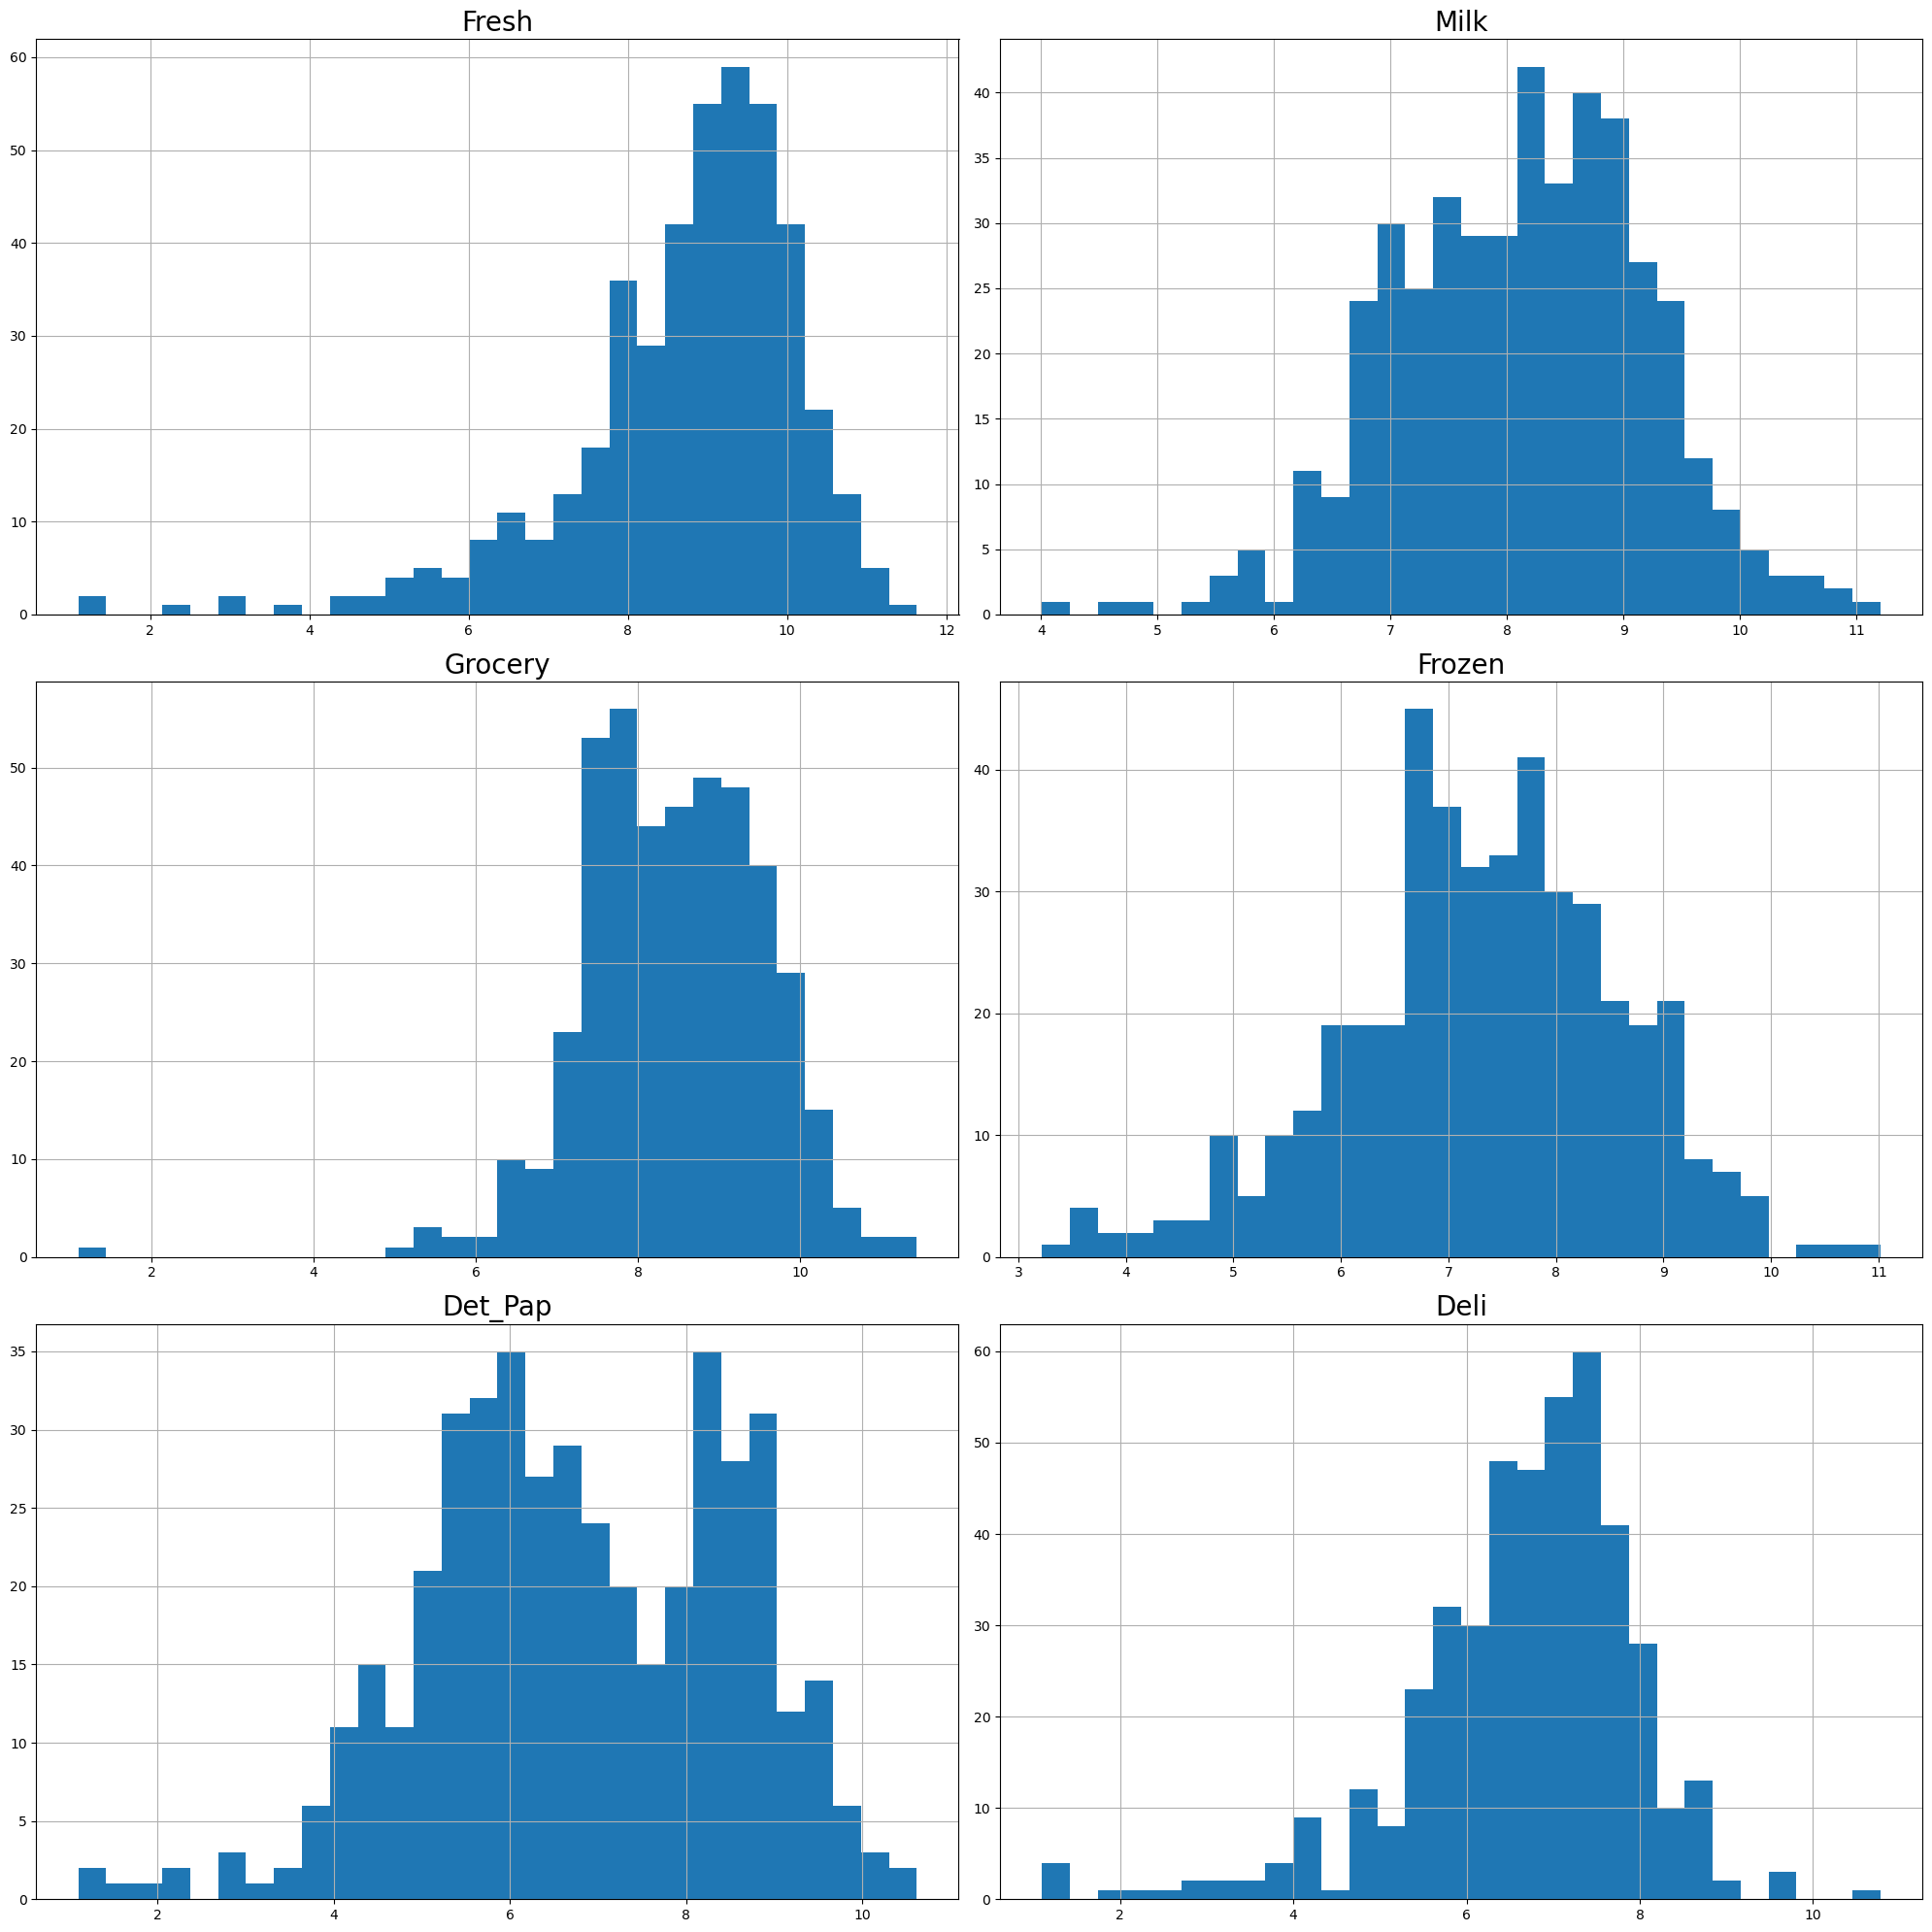

In [108]:
graphing = df1[['Fresh','Milk','Grocery','Frozen','Det_Pap','Deli']]
graphing.hist(bins=30,figsize=(20, 20))
plt.tight_layout()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rc('figure', titlesize=20)
plt.show()

Okay, that looks a lot better. Now, let's finish our work by scaling the data. Though Machine Learning models do perform better when the data fed to them is scaled, it might not have been necessary in this case because these are all dollar values, and so very similar to one another. However, for the sake of the exercise and completeness of preprocessing the data, we're going to go ahead and scale it.

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2 = df1[['Fresh','Milk','Grocery','Frozen','Det_Pap','Deli']]
df3 = scaler.fit_transform(df2)

df4 = pd.DataFrame(df3, columns=df2.columns)
df4.describe()

,Fresh,Milk,Grocery,Frozen,Det_Pap,Deli
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-1.413011e-16,-4.521636e-16,-2.422305e-16,2.018587e-16,1.130409e-16,6.520037e-16
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-5.162332e+00,-3.808515e+00,-6.585828e+00,-3.181814e+00,-3.308406e+00,-4.251391e+00
25%,-4.616414e-01,-7.277472e-01,-6.875511e-01,-5.391077e-01,-7.200844e-01,-4.989215e-01
50%,2.149246e-01,6.953960e-02,2.322023e-02,2.259570e-02,-4.709210e-02,1.584857e-01
75%,6.808223e-01,7.030903e-01,7.468678e-01,6.815637e-01,8.658021e-01,6.427625e-01
max,1.959605e+00,2.855165e+00,2.687964e+00,2.895443e+00,2.228613e+00,3.140996e+00


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [85]:
from sklearn.cluster import KMeans

In [111]:
kmeans_model = KMeans(n_clusters=5, n_init=10)
kmeans_model.fit(df4)

C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, n_init=10)

In [113]:
y_pred = kmeans_model.predict(df4)
y_pred

array([0, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 4, 2, 0, 2, 0, 3,
       3, 0, 0, 4, 3, 2, 0, 2, 0, 2, 2, 3, 2, 4, 3, 0, 4, 3, 3, 0, 4, 4,
       4, 0, 0, 0, 0, 0, 3, 4, 0, 4, 3, 2, 0, 4, 2, 4, 4, 0, 0, 0, 3, 4,
       4, 0, 3, 2, 3, 0, 3, 3, 0, 1, 3, 0, 1, 2, 2, 4, 0, 3, 2, 0, 0, 0,
       1, 3, 1, 3, 0, 3, 4, 4, 4, 1, 1, 3, 0, 0, 0, 3, 2, 2, 4, 0, 4, 4,
       3, 0, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 1, 0, 3, 3, 3, 0, 4, 3, 3, 1,
       2, 2, 2, 2, 0, 4, 2, 2, 0, 2, 1, 3, 2, 0, 2, 2, 1, 2, 2, 2, 3, 2,
       1, 4, 0, 3, 0, 4, 0, 1, 3, 0, 0, 0, 0, 2, 1, 1, 4, 4, 4, 4, 2, 4,
       3, 3, 2, 3, 0, 0, 4, 0, 4, 2, 1, 4, 0, 4, 3, 1, 2, 4, 2, 3, 3, 0,
       3, 2, 0, 0, 0, 1, 1, 4, 1, 4, 0, 0, 3, 0, 2, 0, 0, 0, 4, 3, 4, 1,
       1, 4, 3, 3, 1, 2, 0, 2, 1, 3, 3, 2, 2, 4, 3, 2, 1, 3, 1, 3, 3, 3,
       3, 2, 0, 0, 2, 1, 2, 3, 2, 0, 3, 0, 0, 1, 2, 3, 3, 3, 2, 1, 2, 3,
       4, 0, 0, 3, 0, 1, 1, 2, 2, 3, 2, 1, 3, 1, 3, 0, 2, 0, 3, 3, 3, 1,
       2, 3, 1, 1, 2, 3, 3, 0, 2, 2, 3, 0, 0, 1, 0,

In [114]:
scores = {}

for k in range(1, 10):
  model = KMeans(n_clusters=k, n_init=10)
  model.fit(df4)
  scores[k] = model.inertia_

C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

In [115]:
from sklearn.metrics import silhouette_score

silhouette_score(df4, y_pred)

0.19495763167988148

Wow, this is terrible! Let's look at the elbows below and see if another number of clusters might work better.

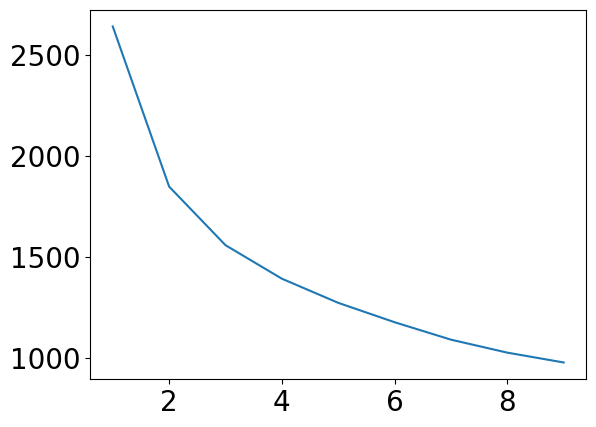

In [116]:
sns.lineplot(x=scores.keys(), y=scores.values())
plt.show()

It looks like there could be as many as 3 elbows in this graph. Let's try it again with 7 and see what we can see.

In [117]:
kmeans_model2 = KMeans(n_clusters=4, n_init=10)
kmeans_model2.fit(df4)

y_pred2 = kmeans_model2.predict(df4)
y_pred2

C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 3, 1, 1, 1, 2,
       3, 1, 1, 0, 2, 2, 1, 3, 1, 3, 2, 3, 2, 0, 3, 1, 0, 3, 3, 3, 0, 0,
       0, 1, 1, 1, 1, 1, 3, 0, 1, 0, 3, 1, 1, 0, 2, 1, 0, 1, 1, 1, 3, 0,
       0, 1, 3, 2, 3, 1, 3, 3, 1, 2, 3, 1, 2, 3, 2, 0, 1, 3, 0, 1, 1, 3,
       2, 3, 2, 3, 1, 3, 0, 0, 0, 2, 2, 2, 1, 1, 1, 3, 3, 2, 0, 1, 0, 0,
       3, 1, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 1, 0, 3, 3, 2,
       2, 2, 2, 2, 1, 0, 3, 3, 3, 3, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3,
       2, 1, 1, 3, 1, 0, 1, 2, 3, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0,
       3, 3, 3, 3, 1, 1, 0, 3, 0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 2, 3, 3, 1,
       3, 2, 1, 1, 3, 2, 2, 1, 2, 0, 1, 1, 3, 1, 2, 1, 1, 1, 0, 3, 0, 2,
       2, 0, 2, 3, 2, 3, 1, 2, 2, 3, 3, 1, 2, 0, 3, 0, 2, 3, 2, 3, 3, 3,
       2, 1, 1, 1, 2, 2, 3, 3, 2, 1, 3, 1, 1, 2, 2, 3, 3, 3, 2, 2, 2, 3,
       0, 1, 1, 3, 1, 2, 2, 2, 0, 3, 2, 2, 3, 2, 3, 1, 2, 1, 3, 3, 3, 2,
       2, 3, 2, 2, 2, 3, 3, 1, 3, 0, 3, 1, 1, 2, 1,

C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

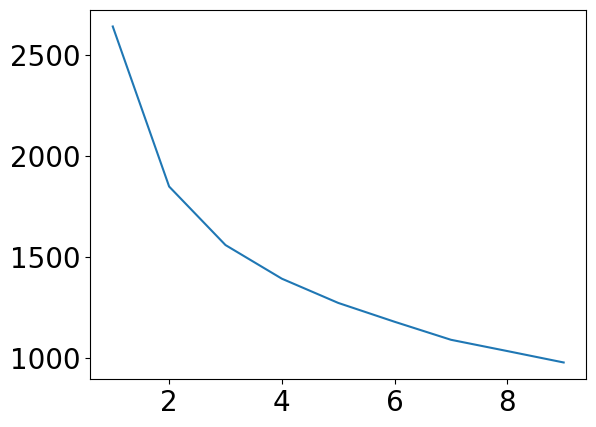

In [118]:
scores = {}

for k in range(1, 10):
  model2 = KMeans(n_clusters=k, n_init=10)
  model2.fit(df4)
  scores[k] = model2.inertia_

sns.lineplot(x=scores.keys(), y=scores.values())
plt.show()

In [119]:
silhouette_score(df4, y_pred2)

0.18777600406796272

This model is even worse! Let's try using the 1 most obvious elbow instead!

In [120]:
kmeans_model3 = KMeans(n_clusters=2, n_init=5)
kmeans_model3.fit(df4)

y_pred3 = kmeans_model3.predict(df4)
y_pred3

C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,

C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ca0pa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

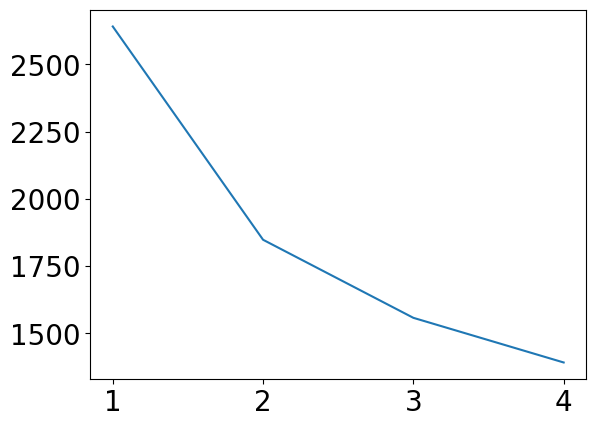

In [121]:
scores = {}

for k in range(1, 5):
  model3 = KMeans(n_clusters=k, n_init=5)
  model3.fit(df4)
  scores[k] = model3.inertia_

sns.lineplot(x=scores.keys(), y=scores.values())
plt.show()

In [122]:
silhouette_score(df4, y_pred3)

0.28958566834148963

This is the winner, 2 clusters. But it's still terrible.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [123]:
from sklearn.cluster import AgglomerativeClustering

hierarchy_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_pred = hierarchy_model.fit_predict(df4)

In [124]:
silhouette_score(df4, y_pred)

0.17801660755627033

Well, Hierarchical Clustering has performed worse than K-means with 5 clusters, but the real advantage of this method is the visualization we can do after the analysis. It's not possible to visualize a scatterplot with 9 variables as above.

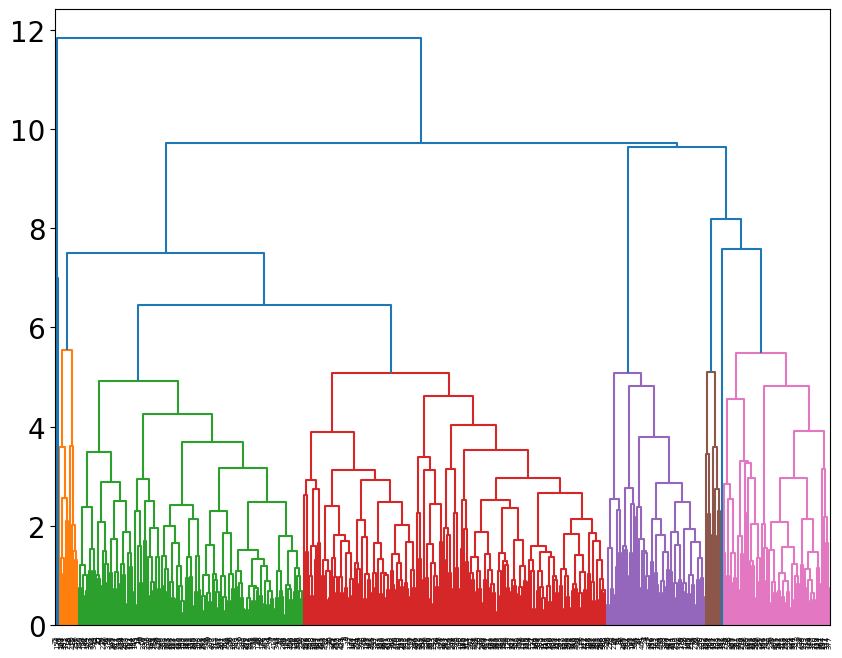

In [125]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

linkage_matrix = linkage(df4, method='complete')

plt.figure(figsize=(10,8))
dendrogram(linkage_matrix, color_threshold=6)
plt.show()

This is one hot mess. But it looks like either 2 or 4 groupings are most supported by the data... so let's do it. 

In [126]:
hierarchy_model2 = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_pred2 = hierarchy_model2.fit_predict(df4)

silhouette_score(df4, y_pred2)

0.18982614496567582

In [127]:
hierarchy_model3 = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred3 = hierarchy_model3.fit_predict(df4)

silhouette_score(df4, y_pred3)

0.2629249016127347

K-means clustering was a slightly better performer, but this visualization was far superior. 

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [129]:
from sklearn.decomposition import PCA

Since this isn't our first time modelling this data, we're going to skip the middle man and go ahead and model with 2 clusters.


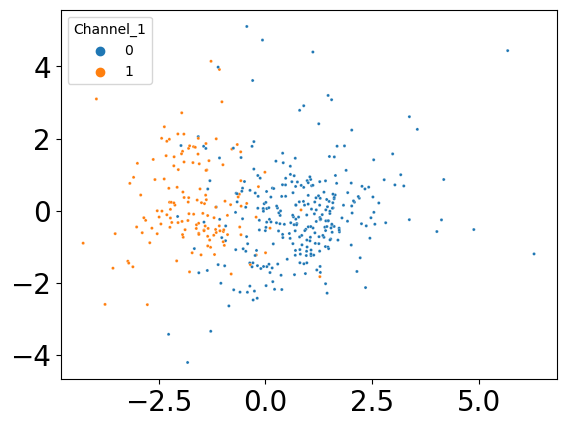

In [131]:
pca = PCA(n_components=2)

X_pca = pca.fit_transform(df4)

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Channel_1'], s=5)
plt.show()

In [132]:
pca.components_

array([[ 0.10462664, -0.54227414, -0.57169402,  0.13835053, -0.5513378 ,
        -0.21223507],
       [-0.59047385, -0.13314537,  0.00628236, -0.58953493,  0.06862424,
        -0.53038924]])

This isn't as terrible as the numbers seem. The models are most definitely splitting the data on 'Channel', even though that isn't in teh data. There are meaningful differences in the buying habits among clients within each of these Channels, and they should be catered to as such in result.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

I used three unsupervised Machine Learning Models to determine the best way to classify clients based on their annual spending habits within 6 categories: 'Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'. 

    - There were no missing values in the dataset, and the variables were all non-normally distributed. We normalized and scaled them for modelling.
    - There were no really substantial outliers once the data was normalized and scaled.
    - None of the three unsupervised models classified the data particularly well. The best, which was a K-means cluster analysis, was able to explain only 28.9% of the variation seen in the dataset.
    - All of the fitted models seemed to agree that the data was best split using only two clusters, which correlated to the variable 'Channel'. 
    - The spending habits of Channel 1 and Channel 2 clients seem to be different, so effort should be made to market to each of them separately. 